# Bond Pricing Tool

## How Bonds Work

### The issuer receives a face value amount from the bondholder and pays the bondholder annuities (coupons) and then returns face value upon maturity
### Coupon Rate (Issuer Pays to Bondholder):
###    -FIXED RATE (irrespective of market interest changes) which the bond issuer pays to the bondholder, based on the bond's face value, until the bond matures
###
### A bond's price will change based on the market interest rate (if investors decide that they demand a different interest rate).
### Consequently, the bond's price will change such that the investor obtains the desired market interest rate.
### If the market desires a higher interest rate than the pre-established coupon rate, the bond price decreases so that the price to buy the bond (present value) is justified by the future cash flows (face value and coupon payments) with respect to the desired interest rate, and not the established coupon rate. Likewise, if the market desires a lower interest rate than the pre-established coupon rate, the bond price increases so that the price to buy the bond is justified by the desired interest rate applied to all future cashflows, and not the established coupon rate.
###

### Enter: Yield to Maturity (YTM) (Equivalent annual yield):
###    -Represents the interest rate that investors demand for holding the bond
###    -Reflects the bondholder's total return if they buy the bond today and hold until maturity (includes coupon payments being re-invested and change in bond face value from purchase to maturity)
###    -If coupon rate is same as return interest rate that investor requires, then bond price = face value
###    -Discount bond (bond price < face value): YTM is higher than coupon rate
###    -Premium Bond (bond price > face value): YTM is lower than coupon rate

## Compute bond prices, yields, and duration

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create function to calculate the present value (PV) of a future cash flow (C):
def PV_of_C(cash_flow, discount_rate, num_periods):
    """
    cash_flow: Value of future cash flow at future time
    discount_rate: Interest rate of the application, per period
    num_periods: Number of periods which the discount_rate compiles over
    """
    
    present_value = cash_flow / ( 1 + discount_rate ) ** num_periods
    
    return present_value

# Create function to calculate bond price
def bond_price(face_value, coupon_rate, years_to_maturity, yield_to_maturity, frequency = 2):
    """
    face_value: Principal amount (par value) that the bondholder will receive at maturity
    coupon_rate: Annual coupon rate as a decimal (5% - 0.05), fixed % that issuer pays to bondholder
    years_to_maturity: Time until bond maturity in years
    yield_to_maturity: Annualized return that investors receive for this bond, useful for comparing different bonds
    frequency: Number of coupon payments per year (default = 2 for semi-annual)
    """
    # Total number of periods
    periods = years_to_maturity * frequency
    
    # Periodic coupon payment to bondholder
    coupon_payment = face_value * coupon_rate / frequency
    
    # Periodic yield to maturity
    ytm_periodic = yield_to_maturity / frequency

    # Calculate the present value of the sum of future coupon payments, +1 since not 0-indexed
    # Note, assumes coupons are re-invested at ytm_periodic and compounded at given frequency
    coupon_pv = sum(PV_of_C(coupon_payment, ytm_periodic, t) for t in range(1, int(periods) + 1))
                    
    # Calculate the present value of the face value (principal repayment at bond maturity)
    face_value_pv = PV_of_C(face_value, ytm_periodic, periods)
    
    # Total bond price is the sum of the PV of the face value and coupons (Net Present Value)
    price = coupon_pv + face_value_pv
    return price

Bond Price: $1081.76


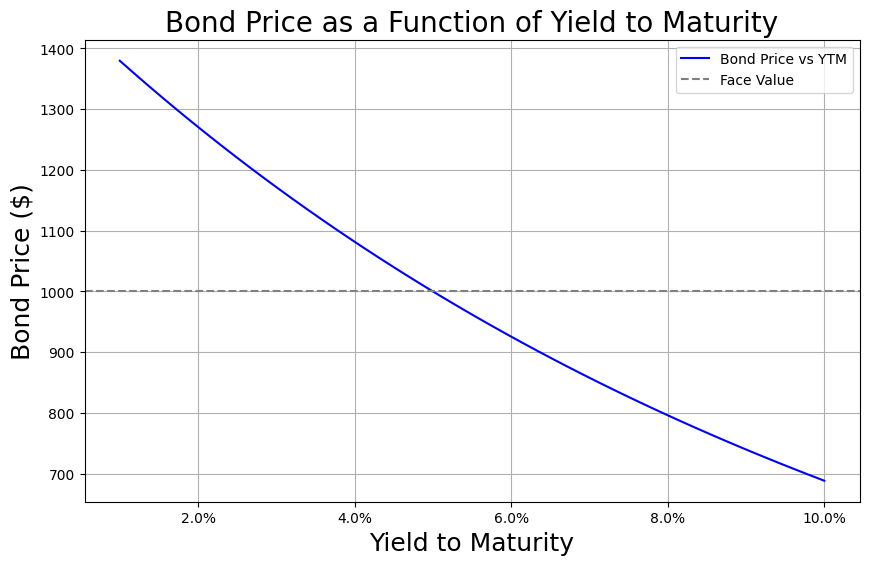

In [12]:
# Input sample bond parameters
face_value = 1000                # The bond's face value (par value)
coupon_rate = 0.05               # Annual coupon rate (5%)
years_to_maturity = 10           # Time to maturity in years
yield_to_maturity = 0.04         # Annualized yield to maturity (4%)  

# Calculate the bond price
price = bond_price(face_value, coupon_rate, years_to_maturity, yield_to_maturity)
print(f"Bond Price: ${price:.2f}")

# Plot price-yield relationship
# Create a range of yield-to-maturity values (from 1% to 10%) for analysis
ytm_values = np.linspace(0.01, 0.1, 50)

# Calculate bond prices for each YTM value
prices = [bond_price(face_value, coupon_rate, years_to_maturity, ytm) for ytm in ytm_values]

# Plot the relationship between YTM and bond price
plt.figure(figsize=(10, 6))
plt.plot(ytm_values, prices, label = 'Bond Price vs YTM', color = "blue")
plt.axhline(y = face_value, color = "gray", linestyle = "--", label = "Face Value")

# Set x-axis labels to percentage format
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))  # 1 means 100%

# Add labels
plt.xlabel('Yield to Maturity', fontsize = 18)
plt.ylabel('Bond Price ($)', fontsize = 18)
plt.title('Bond Price as a Function of Yield to Maturity', fontsize = 20)

plt.grid(True)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>